# Investigating a Drop in User Engagement

Yijie Hua

### Problem:
User engagement has droped ~14% (200 active users) since a month ago in August.
### Framework: 
Internally the drop could be due to <br>
1) the app: <br>
1.1) interactive features: certain event features stopped working, could be specific to platform/device <br>
1.2) static features: e.g. interface layout and languages <br>
2) server: malfuntion resulting users in certain geolocations having trouble access the app <br>
3) marketing intervention: has sent marketing emails that had negative effect users' willingness to engage. <br><br>
Externally, the drop could be due to <br>
1) companies switching to another app <br>
2) holidays or vacation period, maybe limited in certain geolocations <br>
### Hyphothesis:
1) Malfunctions in either the app or the server made a fraction of users stopped using Yammer. <br>
2) August is summer time, people were on vacations so they stopped using Yammer. <br>
3) Companies switched to another app. <br>
### Results:
It seems that hythothesis 2) may be the cause of the drop in Yammer's user engagement in August.<br>
But since the signup flow wasn't affect much in August, the drop in user engagement in August should not be causing major problem for Yammer.

## Data preperation

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots_adjust
import datetime
from itertools import groupby
from operator import itemgetter

In [2]:
user = pd.read_csv('yammer_users.csv')
user.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


In [37]:
event = pd.read_csv('yammer_events.csv', parse_dates=[1])
event.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [38]:
# join user dataset and event dataset to creat the event log for each users

log = pd.merge(user, event, on='user_id')
log.head()

,user_id,created_at,company_id,language,activated_at,state,occurred_at,event_type,event_name,location,device,user_type
0,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0
1,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:32:10,engagement,home_page,India,lenovo thinkpad,3.0
2,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:32:26,engagement,search_autocomplete,India,lenovo thinkpad,3.0
3,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:32:58,engagement,search_autocomplete,India,lenovo thinkpad,3.0
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-24 11:39:53,engagement,login,India,samsung galaxy s4,3.0


Since I'm investigating the drop in user engagement in August 2014, I'd like to dig into the behavior of users who were active in July but stopped engaging in August. So I will first extract users with activity in July but no activity in August, and active users throught out July and August as control. <br><br>
I only focused on August and July of 2014, not even earlier months, assuming there is no significant change in Yammer's user base during two-month period.

In [176]:
# Add week information onto the table for ease of further analysis
july_start_wk = datetime.date(2014,7,1).isocalendar()[1]
july_end_wk = datetime.date(2014,7,31).isocalendar()[1]
aug_start_wk = datetime.date(2014,8,1).isocalendar()[1]+1
aug_end_wk = datetime.date(2014,8,31).isocalendar()[1]

log['week'] = log['occurred_at'].apply(lambda x: '%d' % (x.week))
log['month'] = log['occurred_at'].apply(lambda x: '%d' % (x.month))
log['year'] = log['occurred_at'].apply(lambda x: '%d' % (x.year))


## Visualize the change in number of different events over July and August

In [177]:
# Extrac logs of July and August of 2014
log_ja_2014 = log.loc[(log['week'].astype(int) >= july_start_wk)
                      &(log['week'].astype(int) <= aug_end_wk)
                      &(log['year'].astype(int) == 2014),:]

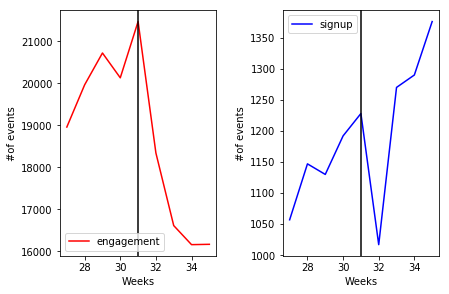

In [185]:
event_type = log_ja_2014.groupby(['event_type', 'week']).size().reset_index(name='counts')
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout()

plt.subplot(1, 2, 1)
plt.plot(event_type[event_type.event_type=='engagement']['week'].astype(int), 
         event_type[event_type.event_type=='engagement']['counts'], 
         color='red', label = 'engagement')
plt.axvline(x=31, color = 'black')
plt.xlabel('Weeks', fontsize=10)
plt.ylabel('#of events', fontsize=10)
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(event_type[event_type.event_type=='signup_flow']['week'].astype(int), 
         event_type[event_type.event_type=='signup_flow']['counts'], 
         color='blue', label = 'signup')
plt.axvline(x=31, color = 'black')
plt.xlabel('Weeks', fontsize=10)
plt.ylabel('#of events', fontsize=10)

plt.legend();


As shown in the plot above, there is a sharp decrease in the number of engagement events in August, comparing to July (week in July and August were seperated by the black vertical line), whereas signup flow remained the same. <br><br>
Thus I'd conclude engagement of existing users is more likely to cause the drop in engagement.

In [180]:
log_ja_2 = log_ja_2014.copy()
log_ja_2.loc[:, 'week'] = log_ja_2014.week.astype(int).values

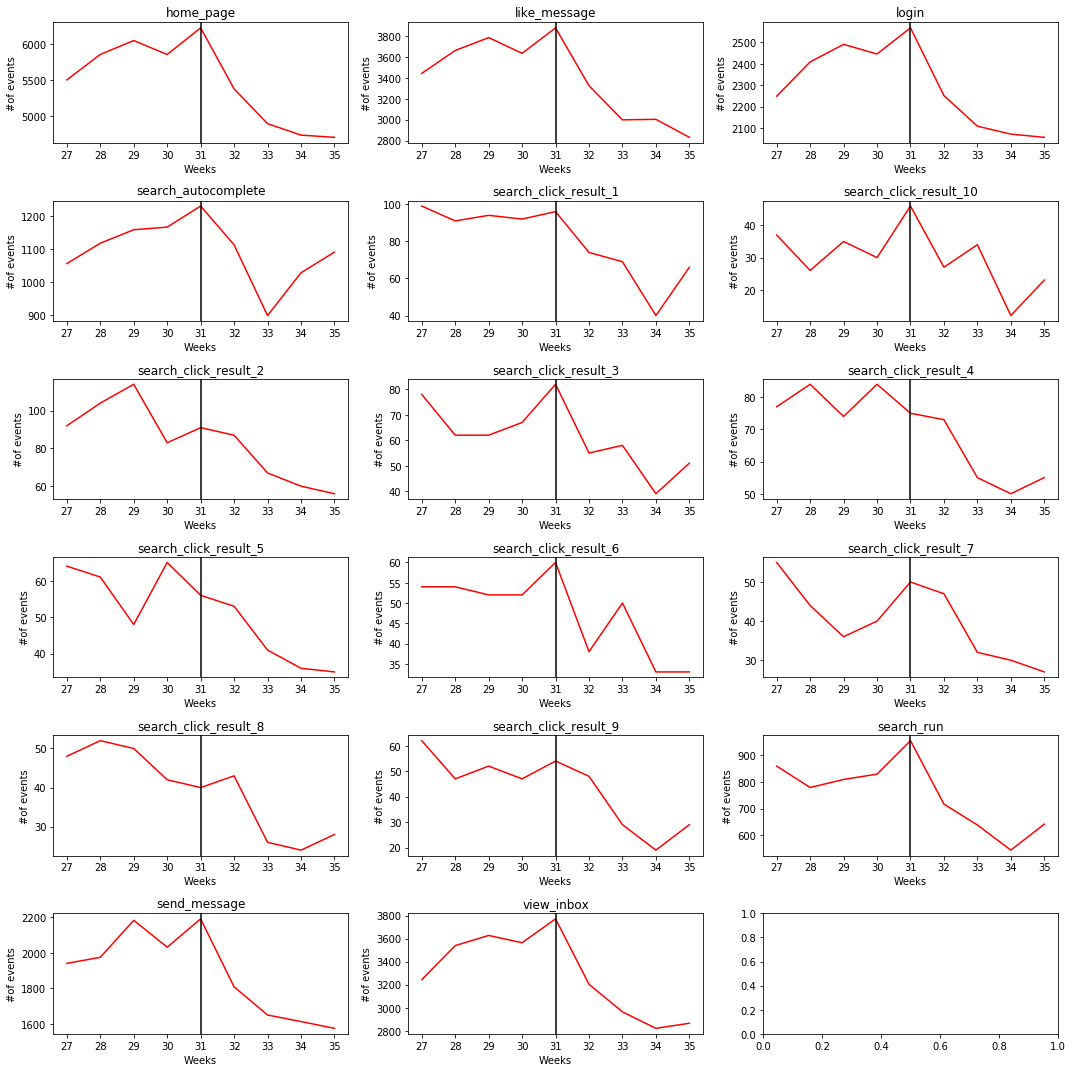

In [186]:
event_name_log = log_ja_2.groupby(['event_name', 'week']).size().reset_index(name = 'counts')
# only plot the engagement event, omit the sign-up events since there is little change in this event type
eventname = event_name_log.event_name.unique()[4:]
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(15,15))

for i in range(len(eventname)):
    plt.subplot(6, 3, i+1)
    plt.plot(event_name_log[event_name_log.event_name==eventname[i]]['week'].astype(int), 
    event_name_log[event_name_log.event_name==eventname[i]]['counts'], 
    color='red')
    plt.axvline(x=31, color = 'black')
    plt.xlabel('Weeks', fontsize=10)
    plt.ylabel('#of events', fontsize=10)
    plt.title(eventname[i]);

fig.tight_layout()


It seems that entering August, there have been drops in all major engagement events including: <br>
home_page: User loads the home page <br>
like_message: User likes another user’s message <br>
login: User logs into Yammer <br>
search_autocomplete: User selects a search result from the autocomplete list <br>
search_run: User runs a search query and is taken to the search results page <br>
send_message: User posts a message <br>
view_inbox: User views messages in her inbox <br>
<br>
Since the drop can be seen in all major events, I'd reject my first hypothesis that app malfunction in certain features caused the drop in engagement.

In [288]:
# monthly_count = log_ja_2.groupby(['event_name', 'month']).size().reset_index(name = 'counts')
# monthly_count = monthly_count.loc[monthly_count.month!='6'][8:]
# monthly_delta = monthly_count.loc[monthly_count.month=='8','counts'].values \
#                 - monthly_count.loc[monthly_count.month=='7','counts'].values
# temp = pd.DataFrame(columns=['Event_name','Delta'])
# temp.Event_name = monthly_count.event_name.unique()
# temp.Delta = monthly_delta/monthly_count.loc[monthly_count.month=='7','counts'].values
# temp = temp.sort_values(by=['Delta'], ascending=False)
# plt.barh(temp.Event_name, temp.Delta)
# plt.title('Totol fraction of changes in August');

## Visualize change in events from different countries over July and August

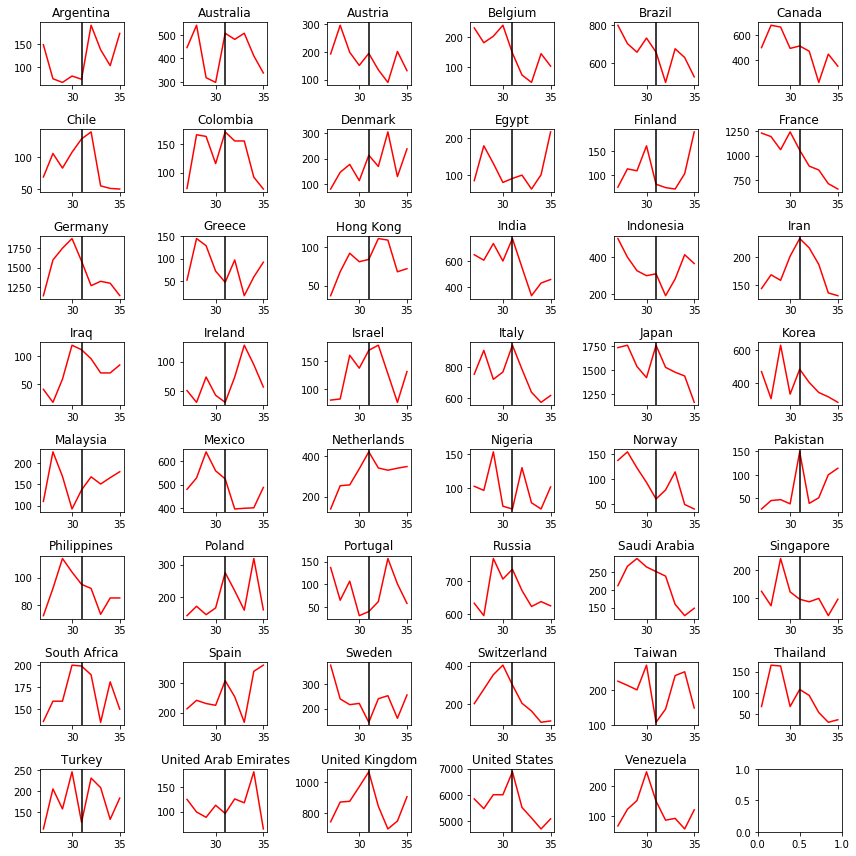

In [233]:
location_log = log_ja_2.groupby(['location', 'week']).size().reset_index(name = 'counts')
# only plot the engagement event, omit the sign-up events since there is little change in this event type
location = location_log.location.unique()
fig, axes = plt.subplots(nrows=8, ncols=6,figsize=(12,12))

for i in range(len(location)):
    plt.subplot(8, 6, i+1)
    plt.plot(location_log[location_log.location==location[i]]['week'].astype(int), 
    location_log[location_log.location==location[i]]['counts'], 
    color='red')
    plt.axvline(x=31, color = 'black')
#     plt.xlabel('Weeks', fontsize=10)
#     plt.ylabel('#of events', fontsize=10)
    plt.title(location[i]);

fig.tight_layout()


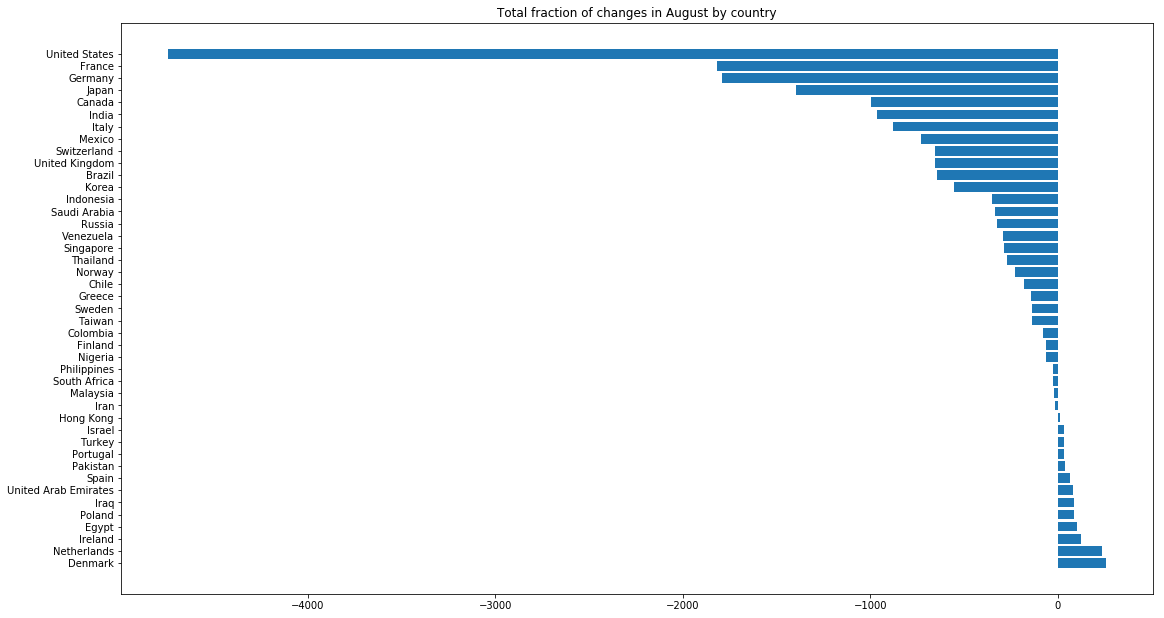

In [241]:
monthly_count = log_ja_2.groupby(['location', 'month']).size().reset_index(name = 'counts')
monthly_count = monthly_count.loc[monthly_count.month!='6'][8:]
monthly_delta = monthly_count.loc[monthly_count.month=='8','counts'].values \
                - monthly_count.loc[monthly_count.month=='7','counts'].values
temp = pd.DataFrame(columns=['location','Delta'])
temp.location = monthly_count.location.unique()
temp.Delta = monthly_delta
temp = temp.sort_values(by=['Delta'], ascending=False)
plt.barh(temp.location, temp.Delta, )
plt.title('Total fraction of changes in August by country');
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

As shown in the two figures above, the drop in number of events are mostly seen in North America and Europe where people tend to have summer vacation in August. Other countries such as most Asian coutnies' user activity remained unaffected except for India. <br>
Thus I will keep my hypothesis (2) that since August is summer time, people were on vacations so they stopped using Yammer.

## Visualize change in events on different devices over July and August

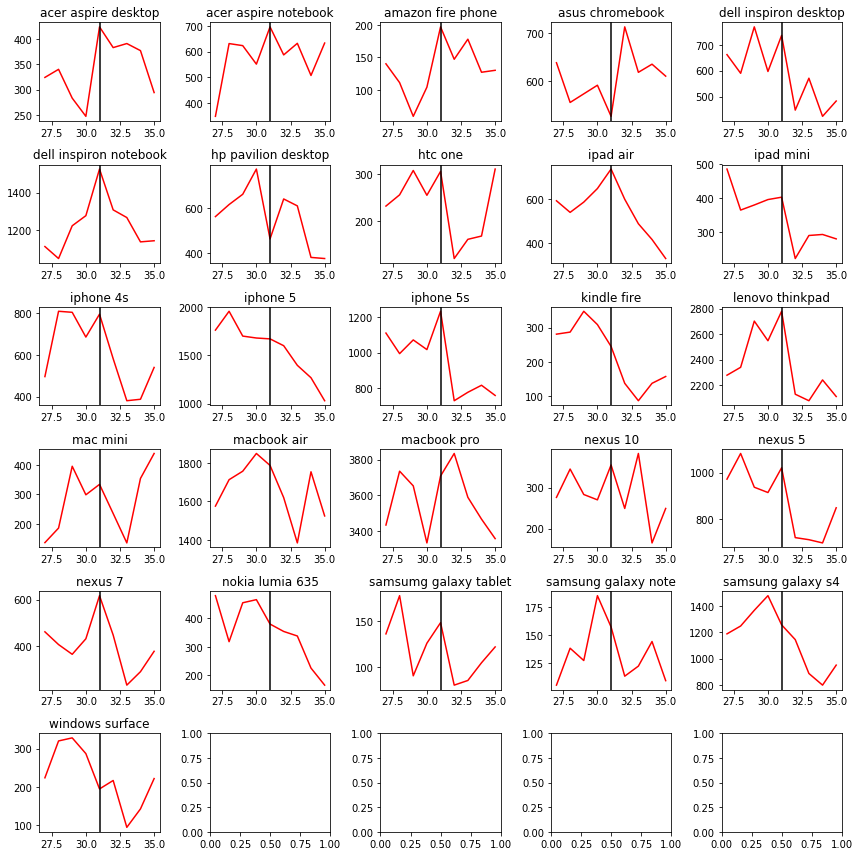

In [278]:
location_log = log_ja_2.groupby(['device', 'week']).size().reset_index(name = 'counts')
# only plot the engagement event, omit the sign-up events since there is little change in this event type
device = location_log.device.unique()
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(12,12))

for i in range(len(device)):
    plt.subplot(6, 5, i+1)
    plt.plot(location_log[location_log.device==device[i]]['week'].astype(int), 
    location_log[location_log.device==device[i]]['counts'], 
    color='red')
    plt.axvline(x=31, color = 'black')
#     plt.xlabel('Weeks', fontsize=10)
#     plt.ylabel('#of events', fontsize=10)
    plt.title(location[i]);

fig.tight_layout()


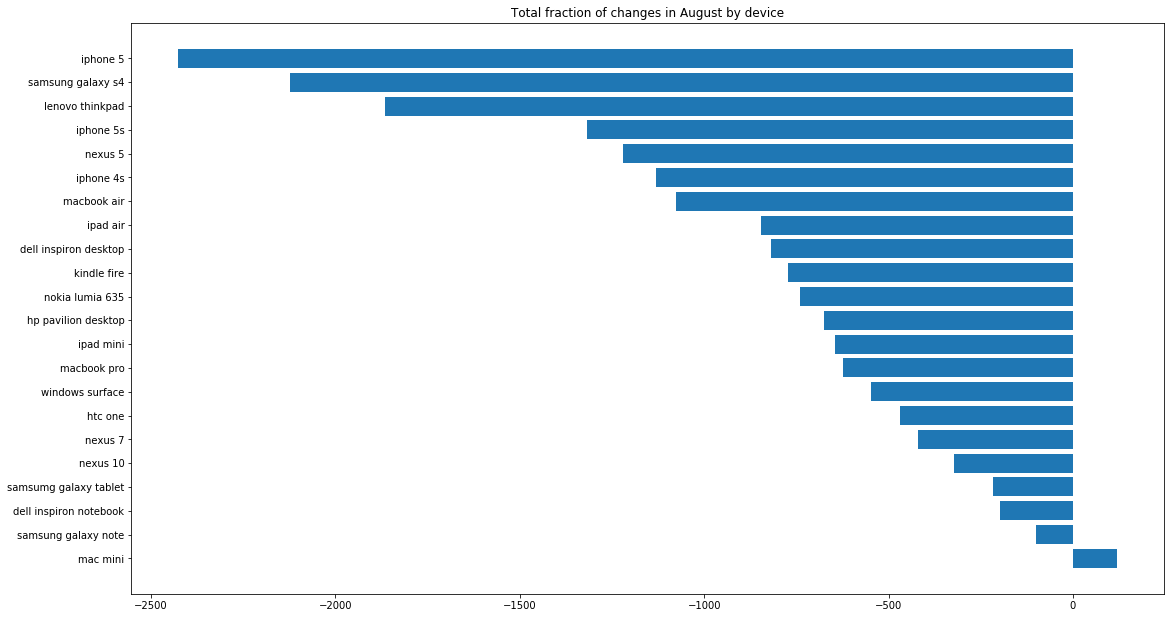

In [287]:
monthly_count = log_ja_2.groupby(['device', 'month']).size().reset_index(name = 'counts')
monthly_count = monthly_count.loc[monthly_count.month!='6'][8:]
monthly_delta = monthly_count.loc[monthly_count.month=='8','counts'].values \
                - monthly_count.loc[monthly_count.month=='7','counts'].values
temp = pd.DataFrame(columns=['device','Delta'])
temp.device = monthly_count.device.unique()
temp.Delta = monthly_delta
temp = temp.sort_values(by=['Delta'], ascending=False)
plt.barh(temp.device, temp.Delta, )
plt.title('Total fraction of changes in August by device');
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

It seems that the drop affect all platforms. Thus we can reject the hypothesis that app malfunction in certain device caused the drop in engagement.

## Confirm the results using user data

In [6]:
july_start_date = pd.to_datetime('2014-07-01', format="%Y-%m-%d")
july_end_date = pd.to_datetime('2014-07-31', format="%Y-%m-%d")

aug_start_date = pd.to_datetime('2014-08-01', format="%Y-%m-%d")
aug_end_date = pd.to_datetime('2014-08-31', format="%Y-%m-%d")

# create mask for all active logs in july and all acrive logs in august
act_july_msk = (log['occurred_at'] >= july_start_date) & (log['occurred_at'] <= july_end_date)
act_aug_msk = (log['occurred_at'] >= aug_start_date) & (log['occurred_at'] <= aug_end_date)

# extract unique user id using the two masks, overlapping ids active in both monthes to be assigned to control, 
# ids only show up in july but not august to be assigned to target
act_july_userid = log.loc[act_july_msk, 'user_id'].unique()
act_aug_userid = log.loc[act_aug_msk, 'user_id'].unique()
id_ctrl = np.intersect1d(act_aug_userid, act_july_userid)
id_target = act_july_userid[~np.isin(act_july_userid, id_ctrl)]

In [7]:
print('%d users were active in both July and August.' %len(id_ctrl))
print('%d users stopped being active starting from August.' %len(id_target))


1330 users were active in both July and August.
2576 users stopped being active starting from August.


In [221]:
user_ctrl = user[user['user_id'].isin(id_ctrl)]
# for easier comparison, randomly sample dropped users so we have same number of users stayed and dropped
user_miss = user[user['user_id'].isin(id_target)].sample(n=1330, random_state=1)
user_ctrl['if_aug_active'] = 1
user_miss['if_aug_active'] = 0
user_2 = user_ctrl.append(user_miss).copy()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


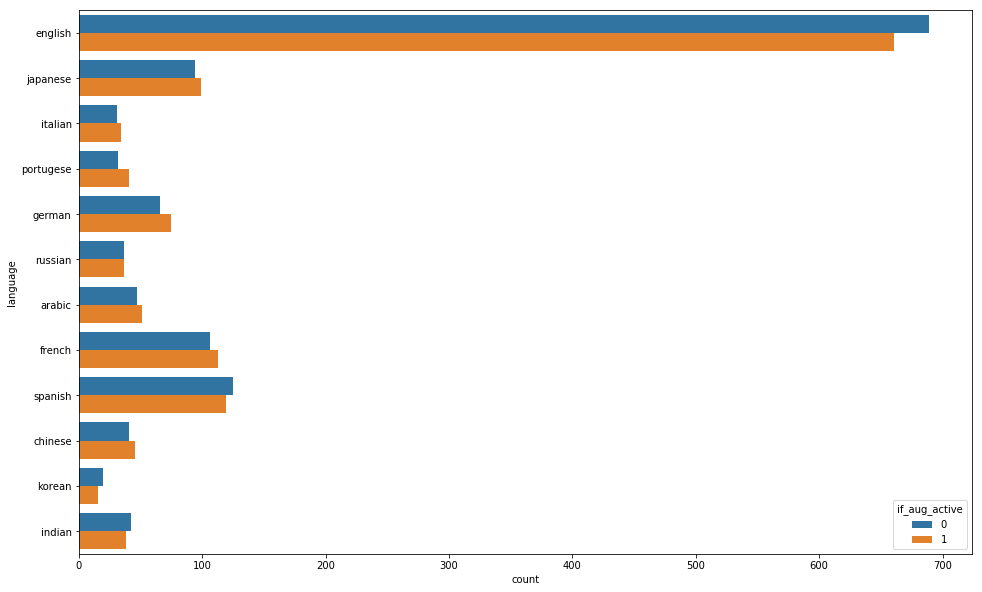

In [268]:
ax = sns.countplot(y='language', hue = 'if_aug_active', data=user_2)
fig = plt.gcf()
fig.set_size_inches(16, 10)

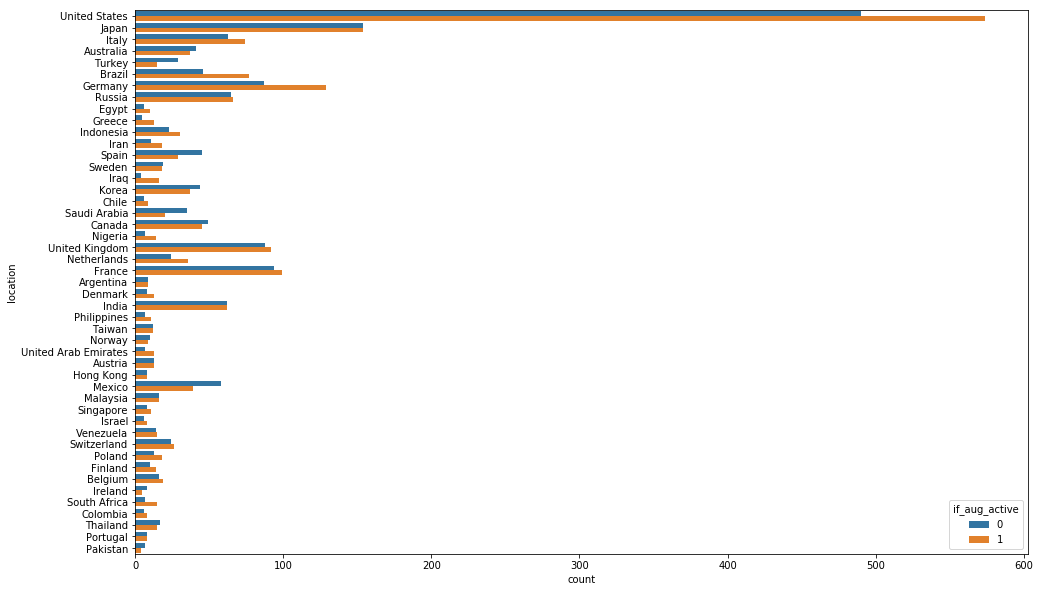

In [295]:
# merge user table and event table to get more information on the users
# only using data before August in 2014
log_ba_2014 = log.loc[(log['week'].astype(int) <= aug_start_wk)
                      &(log['year'].astype(int) == 2014),:]
userlog = pd.merge(user_2, log_ba_2014, on='user_id')
userlog_temp = userlog.drop(columns=['occurred_at', 'event_type', 'event_name', 'device', 'week', 'month']).drop_duplicates()
ax = sns.countplot(y='location', hue = 'if_aug_active', data=userlog_temp)
fig = plt.gcf()
fig.set_size_inches(16, 10)

It confirmed the hyothesis 1) since the 'dropped' users are more likely to be seen in North American and European contries, giving the assumption each user can only have one location.

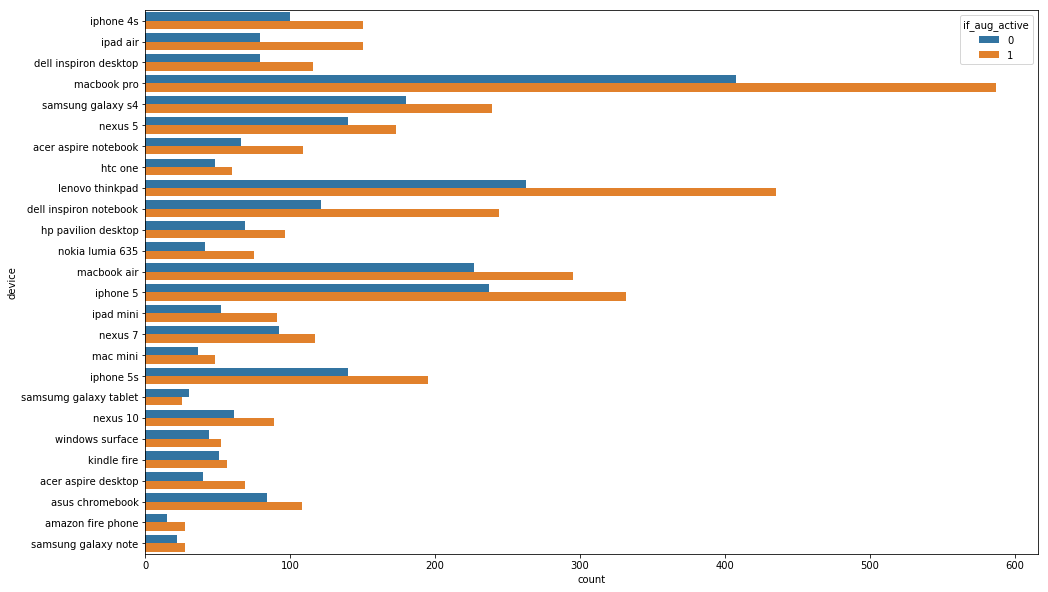

In [294]:
userlog_temp = userlog.drop(columns=['occurred_at', 'event_type', 'event_name', 'week', 'month']).drop_duplicates()
ax = sns.countplot(y='device', hue = 'if_aug_active', data=userlog_temp)
fig = plt.gcf()
fig.set_size_inches(16, 10)

The above plots confirmed that the trend of decreasing number of active users is consistant across most devices.